In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf

In [ ]:
# understand the data

In [2]:
data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

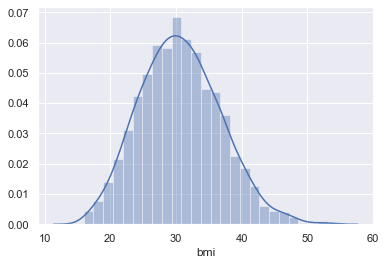

In [5]:
sns.distplot(data["bmi"])

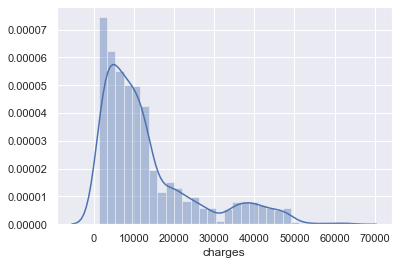

In [6]:
sns.distplot(data["charges"])

In [90]:
data["charges"].mean(),data["charges"].std()

(13270.422265141257, 12110.011236693994)

In [ ]:
# preprocess the data for model training

In [106]:
data_shuffle=data.sample(frac=1)
data_shuffle

,age,sex,bmi,children,smoker,region,charges
837,56,female,28.310,0,no,northeast,11657.71890
1001,24,male,32.700,0,yes,southwest,34472.84100
1046,43,female,25.080,0,no,northeast,7325.04820
110,54,male,33.630,1,no,northwest,10825.25370
294,25,male,26.800,3,no,southwest,3906.12700
...,...,...,...,...,...,...,...
211,40,male,30.875,4,no,northwest,8162.71625
546,28,male,35.435,0,no,northeast,3268.84665
107,26,male,30.875,2,no,northwest,3877.30425
671,29,female,31.160,0,no,northeast,3943.59540


In [107]:
data_shuffle=data_shuffle.reset_index(drop=True)
data_shuffle

,age,sex,bmi,children,smoker,region,charges
0,56,female,28.310,0,no,northeast,11657.71890
1,24,male,32.700,0,yes,southwest,34472.84100
2,43,female,25.080,0,no,northeast,7325.04820
3,54,male,33.630,1,no,northwest,10825.25370
4,25,male,26.800,3,no,southwest,3906.12700
...,...,...,...,...,...,...,...
1333,40,male,30.875,4,no,northwest,8162.71625
1334,28,male,35.435,0,no,northeast,3268.84665
1335,26,male,30.875,2,no,northwest,3877.30425
1336,29,female,31.160,0,no,northeast,3943.59540


In [110]:
x=data_shuffle.drop("charges",axis=1)
y=data_shuffle["charges"]

In [111]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [112]:
CT=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
    )

In [116]:
CT.fit(x)
x_scaled=CT.transform(x)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_all_train,x_test,y_all_train,y_test=train_test_split(x_scaled,y,test_size=0.1,random_state=365)

In [119]:
x_train,x_validation,y_train,y_validation=train_test_split(x_all_train,y_all_train,test_size=0.1,random_state=365)

In [120]:
x_train.shape,x_validation.shape,x_test.shape,y_train.shape,y_validation.shape,y_test.shape

((1083, 11), (121, 11), (134, 11), (1083,), (121,), (134,))

In [ ]:
# create the neural nerwork model

In [121]:
train_inputs=tf.constant(x_train)
train_targets=tf.constant(y_train)

validation_inputs=tf.constant(x_validation)
validation_targets=tf.constant(y_validation)

test_inputs=tf.constant(x_test)
test_targets=tf.constant(y_test)

In [141]:
tf.random.set_seed(100)

input_size=11
output_size=1
hidden_layer_size=100
batch_size=50
early_stopping=tf.keras.callbacks.EarlyStopping(patience=3)

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(hidden_layer_size,activation="relu"),
                           tf.keras.layers.Dense(hidden_layer_size,activation="relu"),
                           tf.keras.layers.Dense(hidden_layer_size,activation="relu"),
                           tf.keras.layers.Dense(output_size,activation="relu")
                          ])

model.compile(optimizer="adam",loss="huber",metrics=["mae"])

model.fit(train_inputs,train_targets,batch_size=batch_size,callbacks=[early_stopping],
         validation_data=(validation_inputs,validation_targets),epochs=100,verbose=2)

Epoch 1/100
22/22 - 1s - loss: 12909.7861 - mae: 12910.2871 - val_loss: 15612.4033 - val_mae: 15612.9033
Epoch 2/100
22/22 - 0s - loss: 12905.5293 - mae: 12906.0283 - val_loss: 15600.8477 - val_mae: 15601.3477
Epoch 3/100
22/22 - 0s - loss: 12871.2842 - mae: 12871.7842 - val_loss: 15522.4473 - val_mae: 15522.9473
Epoch 4/100
22/22 - 0s - loss: 12699.3350 - mae: 12699.8359 - val_loss: 15193.5752 - val_mae: 15194.0752
Epoch 5/100
22/22 - 0s - loss: 12113.9434 - mae: 12114.4443 - val_loss: 14212.8984 - val_mae: 14213.3984
Epoch 6/100
22/22 - 0s - loss: 10699.4395 - mae: 10699.9404 - val_loss: 12323.5332 - val_mae: 12324.0332
Epoch 7/100
22/22 - 0s - loss: 8804.0957 - mae: 8804.5967 - val_loss: 10399.4893 - val_mae: 10399.9893
Epoch 8/100
22/22 - 0s - loss: 7769.4883 - mae: 7769.9888 - val_loss: 9868.4521 - val_mae: 9868.9521
Epoch 9/100
22/22 - 0s - loss: 7591.6313 - mae: 7592.1313 - val_loss: 9678.6992 - val_mae: 9679.1992
Epoch 10/100
22/22 - 0s - loss: 7444.7129 - mae: 7445.2129 - val_

In [ ]:
# evaluate the model sufficiency 

In [142]:
loss,mae=model.evaluate(test_inputs,test_targets)

5/5 [==============================] - 0s 2ms/step - loss: 3071.4351 - mae: 3071.9299


In [143]:
print(mae)

3071.929931640625
